<a href="https://colab.research.google.com/github/himesh992/Himesh992/blob/main/EV_MARKET_FEYN_LAB_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#LOAD THE DATA
from google.colab import files ;upload = files.upload()

Saving test-data.csv to test-data.csv


In [ ]:
df = pd.read_csv("test-data.csv")

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
import pandas as pd

# Assuming the data is loaded into a dataframe named 'df'

# Count missing values in 'Power' and 'Engine' columns
missing_in_power = df['Power'].isnull().sum()
missing_in_engine = df['Engine'].isnull().sum()

# Print the results
print(f"Number of missing values in 'Power': {missing_in_power}")
print(f"Number of missing values in 'Engine': {missing_in_engine}")


Number of missing values in 'Power': 10
Number of missing values in 'Engine': 10


In [ ]:
null_values = ["null bhp", "null cc"]
# Identify rows with "null bhp" or "null cc" in either 'Engine' or 'Power'
filtered_df = df[(df['Engine'].isin(null_values)) | (df['Power'].isin(null_values))]

# You can now explore or analyze these rows further
print(filtered_df)


      Unnamed: 0                                     Name    Location  Year  \
3              3                     Toyota Etios Liva GD   Hyderabad  2012   
74            74                   Hyundai Santro Xing XL   Bangalore  2007   
122          122                     Toyota Etios Liva GD      Jaipur  2012   
143          143             Ford Fiesta 1.4 SXI Duratorq      Jaipur  2008   
191          191                          Tata Indica DLS     Chennai  2006   
197          197        Hindustan Motors Contessa 2.0 DSL        Pune  1996   
259          259                          Toyota Etios GD   Bangalore  2012   
367          367                       Nissan Teana 230jM  Coimbatore  2009   
409          409                       Nissan Teana 230jM     Chennai  2008   
420          420           Hyundai Santro GLS I - Euro II   Bangalore  2011   
426          426              Maruti Swift VDI BSIV W ABS  Coimbatore  2016   
435          435        Hyundai Santro LS zipDrive E

In [ ]:
import pandas as pd

# Assuming the data is loaded into a dataframe named 'df'

null_values = ["null bhp", "null cc"]

# Count rows with values from 'null_values' list in either 'Engine' or 'Power'
count_null_values = (df['Engine'].isin(null_values) | df['Power'].isin(null_values)).sum()

print(f"Number of rows with 'null bhp' or 'null cc': {count_null_values}")


Number of rows with 'null bhp' or 'null cc': 22


In [ ]:
import pandas as pd

# Assuming the data is loaded into a dataframe named 'df'

# Drop rows with missing values in 'Engine' or 'Power'
df_cleaned = df.dropna(subset=['Engine', 'Power'])

# Now 'df_cleaned' excludes rows with missing values in either column


In [ ]:
num_rows_engine = len(df_cleaned['Engine'])
num_rows_power = len(df_cleaned['Power'])

# Print the results
print(f"Number of rows in 'Engine': {num_rows_engine}")
print(f"Number of rows in 'Power': {num_rows_power}")


Number of rows in 'Engine': 1224
Number of rows in 'Power': 1224


In [ ]:
null_values = ["null bhp", "null cc"]
# Identify rows with "null bhp" or "null cc" or any other missing value
filtered_df = df[(df['Engine'].isin(null_values)) | (df['Engine'].isnull()) |  # Engine
                 (df['Power'].isin(null_values)) | (df['Power'].isnull())]  # Power

# You can now drop these rows from the original dataframe
df_cleaned = df.drop(filtered_df.index)

# Or view the dropped rows (optional)
print(filtered_df)


      Unnamed: 0                                     Name    Location  Year  \
3              3                     Toyota Etios Liva GD   Hyderabad  2012   
23            23             Skoda Laura 1.8 TSI Ambition   Bangalore  2009   
74            74                   Hyundai Santro Xing XL   Bangalore  2007   
122          122                     Toyota Etios Liva GD      Jaipur  2012   
143          143             Ford Fiesta 1.4 SXI Duratorq      Jaipur  2008   
191          191                          Tata Indica DLS     Chennai  2006   
197          197        Hindustan Motors Contessa 2.0 DSL        Pune  1996   
259          259                          Toyota Etios GD   Bangalore  2012   
367          367                       Nissan Teana 230jM  Coimbatore  2009   
409          409                       Nissan Teana 230jM     Chennai  2008   
420          420           Hyundai Santro GLS I - Euro II   Bangalore  2011   
426          426              Maruti Swift VDI BSIV 

In [ ]:
num_rows_engine = len(df_cleaned['Engine'])
num_rows_power = len(df_cleaned['Power'])

# Print the results
print(f"Number of rows in 'Engine': {num_rows_engine}")
print(f"Number of rows in 'Power': {num_rows_power}")


Number of rows in 'Engine': 1202
Number of rows in 'Power': 1202


In [ ]:
# Assuming 'df' is your dataframe
df['Engine_Cleaned'] = df['Engine'].str.replace(r"[cC][bB][hH][pP]", "", regex=True)
df['Power_Cleaned'] = df['Power'].str.replace(r"[bB][hH][pP]", "", regex=True)


In [ ]:
try:
  # Attempt conversion after cleaning (if needed)
  df['Engine_Numeric'] = pd.to_numeric(df['Engine_Cleaned'])
  df['Power_Numeric'] = pd.to_numeric(df['Power_Cleaned'])
  print("Conversion successful (assuming cleaning was done)!")
except:
  print("Error: Some values could not be converted to numeric.")


Error: Some values could not be converted to numeric.


In [ ]:
# Example for handling inconsistent formats
unit_patterns = [r"[bB][hH][pP]", r"[bB][hH][pP]", r"[hH][pP]"]  # List of patterns

for pattern in unit_patterns:
  df['Power_Numeric'] = df['Power'].str.replace(pattern, "", regex=True)


In [ ]:
import pandas as pd

# Assuming 'df' is your dataframe
# Improved regular expression to capture trailing characters
df['Power_Numeric'] = df['Power'].str.replace(r"[bB][hH][pP][\s]*", "", regex=True)

# Now you can use 'Power_Numeric' for numerical analysis



In [ ]:
try:
  df['Power_Numeric'] = df['Power_Numeric'].astype(float)
except:
  print("Error: Some values could not be converted to numeric.")
  # Handle errors (e.g., log them, replace with NaN)


Error: Some values could not be converted to numeric.


In [ ]:
import pandas as pd

# Assuming 'df' is your dataframe containing the 'Power' column

# Improved regular expression for unit suffix removal
improved_regex = r"[bB][hH][pP][\s]*"

# Clean 'Power' column (remove unit suffix and any trailing spaces)
df['Power_Cleaned'] = df['Power'].str.replace(improved_regex, "", regex=True)

try:
  # Attempt conversion to float
  df['Power_Numeric'] = pd.to_numeric(df['Power_Cleaned'], errors='coerce')
except:
  print("Error: Some values could not be converted to numeric.")

# Handle missing values (NaNs) introduced by 'errors='coerce' (optional)
# You can choose one of these approaches or implement your own:
# Option 1: Drop rows with NaN (if errors are concentrated and not critical)
# df.dropna(subset=['Power_Numeric'], inplace=True)

# Option 2: Impute missing values (e.g., with mean/median)
# df['Power_Numeric'].fillna(df['Power_Numeric'].mean(), inplace=True)

# Further data exploration and analysis (optional)
# You can use 'df['Power_Numeric']' for numerical operations
# Consider data visualization techniques (histograms, box plots) to identify outliers


In [ ]:
# Assuming 'df' is your dataframe
print(df['Power_Numeric'].describe())


count    1202.000000
mean      110.380420
std        51.543818
min        34.200000
25%        75.000000
50%        93.700000
75%       130.000000
max       616.000000
Name: Power_Numeric, dtype: float64


In [ ]:
# Highest CC
highest_cc = df['Power_Numeric'].max()

# Lowest CC
lowest_cc = df['Power_Numeric'].min()

# Average CC
average_cc = df['Power_Numeric'].mean()

# Print the results
print("Highest CC:", highest_cc)
print("Lowest CC:", lowest_cc)
print("Average CC:", average_cc)


Highest CC: 616.0
Lowest CC: 34.2
Average CC: 110.3804201331115


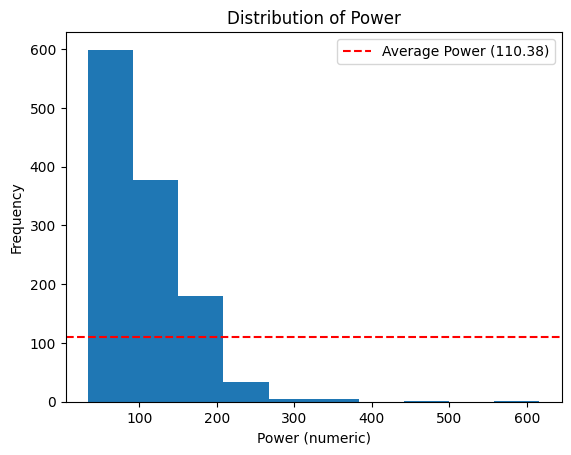

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
average_power = df['Power_Numeric'].mean()

# Histogram with average line
plt.hist(df['Power_Numeric'])
plt.axhline(y=average_power, color='red', linestyle='dashed', label=f'Average Power ({average_power:.2f})')
plt.xlabel('Power (numeric)')
plt.ylabel('Frequency')
plt.title('Distribution of Power')
plt.legend()
plt.show()
